# Discrete Anomaly Detection Exercises

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Assignment:

### Using the anonymized-curriculum-access.txt log file, answer the following questions:

In [2]:
# gonna start by trying to get this .txt into useful data:
df = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', header=None)
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


Each column entry in the provided example represents the following:

1. **Index**: This is the index number of the row in the dataframe.
2. **date**: This is the date of the log entry.
3. **time**: This is the time of the log entry.
4. **page_viewed**: This is the name of the web page visited.
5. **user_id**: This is the ID of the user who visited the page.
6. **cohort_id**: This is the ID of the cohort to which the user belongs.
7. **ip**: This is the IP address of the user who visited the page.

So, the example log entry indicates that on January 26, 2018, at 9:56:02 AM, a user with ID 1 from cohort 8.0 visited the "java-ii" page on the website from IP address 97.105.19.61.

In [3]:
# let's go ahead and rename columns then:
df = df.rename(columns={0:'date', 1:'time', 2:'page_viewed', 
                   3:'user_id', 4:'cohort_id', 5:'ip'})
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         900223 non-null  object 
 1   time         900223 non-null  object 
 2   page_viewed  900222 non-null  object 
 3   user_id      900223 non-null  int64  
 4   cohort_id    847330 non-null  float64
 5   ip           900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [5]:
df.groupby(['cohort_id', 'user_id']).max()

/var/folders/pd/dk0dsnvs72ng9hv5mkv2d0980000gn/T/ipykernel_1188/2077173741.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(['cohort_id', 'user_id']).max()


date      time              ip
cohort_id user_id                                      
1.0       11       2018-12-06  23:20:03    99.203.26.55
          60       2018-06-11  23:58:44    97.105.19.61
          64       2018-12-06  20:10:36    97.105.19.61
          95       2018-02-16  16:42:05   24.26.238.218
          141      2018-04-05  14:52:36    97.105.19.61
...                       ...       ...             ...
139.0     975      2021-04-21  21:56:38  68.203.215.174
          976      2021-04-21  18:24:24     72.26.31.59
          977      2021-04-21  23:46:56    70.117.9.243
          978      2021-04-21  23:19:47    73.85.64.161
          979      2021-04-21  23:51:11   107.77.222.49

[952 rows x 3 columns]

In [6]:
df[df.cohort_id == 1.0].groupby('user_id').count().sort_values('date')

,date,time,page_viewed,cohort_id,ip
user_id,,,,,
212,1,1,1,1,1
95,9,9,9,9,9
141,9,9,9,9,9
316,14,14,14,14,14
209,17,17,17,17,17
402,17,17,17,17,17
257,34,34,34,34,34
170,45,45,45,45,45
248,48,48,48,48,48


In [7]:
df.user_id.size

900223

In [8]:
df.user_id.nunique()

981

In [9]:
df.cohort_id.nunique()

47

In [10]:
# appear to be 47 unique cohorts and then NaNs

In [11]:
pd.Series(df.cohort_id.unique()).sort_values().reset_index(drop=True)

0       1.0
1       2.0
2       4.0
3       5.0
4       6.0
5       7.0
6       8.0
7       9.0
8      11.0
9      12.0
10     13.0
11     14.0
12     15.0
13     16.0
14     17.0
15     18.0
16     19.0
17     21.0
18     22.0
19     23.0
20     24.0
21     25.0
22     26.0
23     27.0
24     28.0
25     29.0
26     31.0
27     32.0
28     33.0
29     34.0
30     51.0
31     52.0
32     53.0
33     55.0
34     56.0
35     57.0
36     58.0
37     59.0
38     61.0
39     62.0
40    132.0
41    133.0
42    134.0
43    135.0
44    137.0
45    138.0
46    139.0
47      NaN
dtype: float64

In [12]:
# cohort ids have some big gaps in the numbering as well as NaNs
# maybe the NaNs are staff who don't have a cohort assigned.
# explore that
df.cohort_id.isna().value_counts()

False    847330
True      52893
Name: cohort_id, dtype: int64

In [13]:
# looks like there were almost 53k entries with no cohort_id.
# how many entries/user? compared to users in cohorts?
# start by replacing the NaNs with a value so easier to work with.

In [14]:
# going to replace the NaN's with 999 since that will make
# them easier to work with for now and 999 is not currently
# being used
df.cohort_id = df.cohort_id.fillna(999)
df[df.cohort_id == 999].user_id.nunique()

78

In [15]:
# average number of entries per unique user who doesn't have cohort
df[df.cohort_id == 999].shape[0] /\
df[df.cohort_id == 999].user_id.nunique()


678.1153846153846

In [16]:
# average number of entries per unique user who has cohort assigned
df[df.cohort_id != 999].shape[0] /\
df[df.cohort_id != 999].user_id.nunique()

930.1097694840835

In [17]:
# ok, the average number of entries per unassigned user was much lower
# lets look at the distributions
non_students = df[df.cohort_id == 999]
students = df[df.cohort_id != 999]

In [18]:
non_stud_dist = non_students.groupby('user_id').count().sort_values(
    'page_viewed', ascending = False)
stud_dist = students.groupby('user_id').count().sort_values(
    'page_viewed', ascending = False)

<AxesSubplot:xlabel='page_viewed', ylabel='Count'>

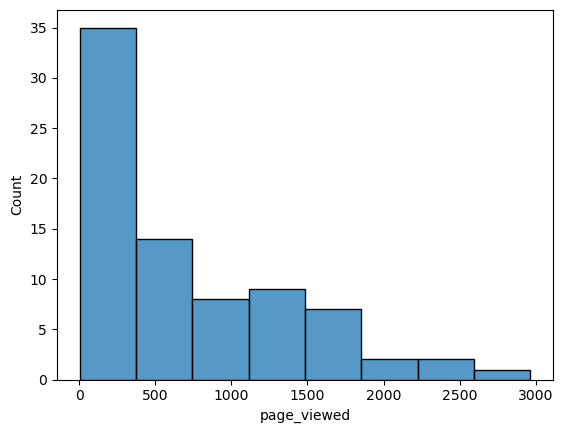

In [19]:
sns.histplot(data=non_stud_dist, x='page_viewed')

<AxesSubplot:xlabel='page_viewed', ylabel='Count'>

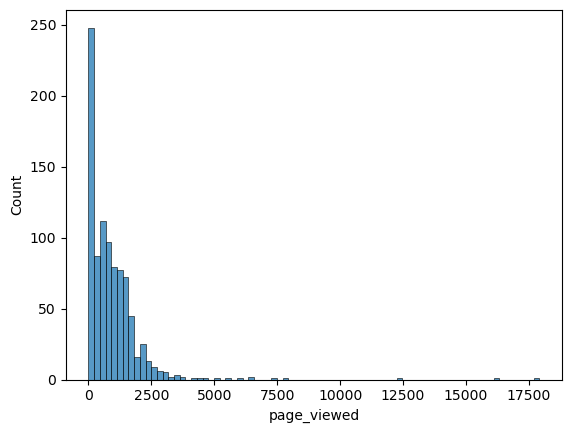

In [20]:
sns.histplot(data=stud_dist, x='page_viewed')

In [21]:
# looks like both of these have a right skew, but there are some much more
# extreme outliers on the students side

In [22]:
# I think it's worth doing to make the date and time into a datetime index
df['date_time'] = df.date + ' ' + df.time

In [23]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip,date_time
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-26 09:56:24


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         900223 non-null  object 
 1   time         900223 non-null  object 
 2   page_viewed  900222 non-null  object 
 3   user_id      900223 non-null  int64  
 4   cohort_id    900223 non-null  float64
 5   ip           900223 non-null  object 
 6   date_time    900223 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.1+ MB


In [25]:
# now see if we can cast to pd.datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         900223 non-null  object        
 1   time         900223 non-null  object        
 2   page_viewed  900222 non-null  object        
 3   user_id      900223 non-null  int64         
 4   cohort_id    900223 non-null  float64       
 5   ip           900223 non-null  object        
 6   date_time    900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 48.1+ MB


In [27]:

df.set_index('date_time', inplace=True)
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
date_time,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [28]:
# now go ahead and reset index
df.reset_index()

,date_time,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...,...
900218,2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21 16:44:37,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [29]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

#### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


#### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


#### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


#### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


#### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


#### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


<AxesSubplot:xlabel='date_time'>

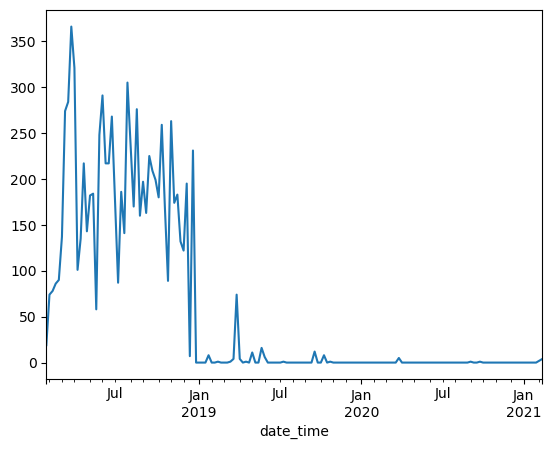

In [30]:
# how do I tell when a cohort was active? Maybe I could plot over time
# and see when the traffic drops off? probably needs to be resampled
df[df.cohort_id == 1.0].resample('W').count()['ip'].plot()

In [31]:
# let's find the start date for this cohort:
df[df.cohort_id == 1.0].index.min()

Timestamp('2018-01-26 10:14:47')

<AxesSubplot:xlabel='date_time'>

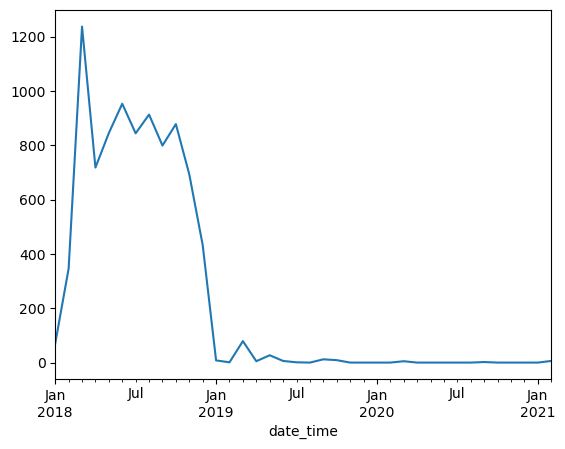

In [32]:
# so Jan 26th, 2018 through about the end of December 2018. 
# That program appears to have been about 11 months. How do I
# make a function that will take each cohort and find the approx
# dates of the class? The min should get the start date. The end
# date should look a little bit more like an extended drop off in
# log entries. What if I just smooth to month for this?
df[df.cohort_id == 1.0].resample('M').count()['ip'].plot()

In [33]:
# let's look at the graphs for all cohorts
cohorts = pd.Series(df.cohort_id.unique()).sort_values().to_list()

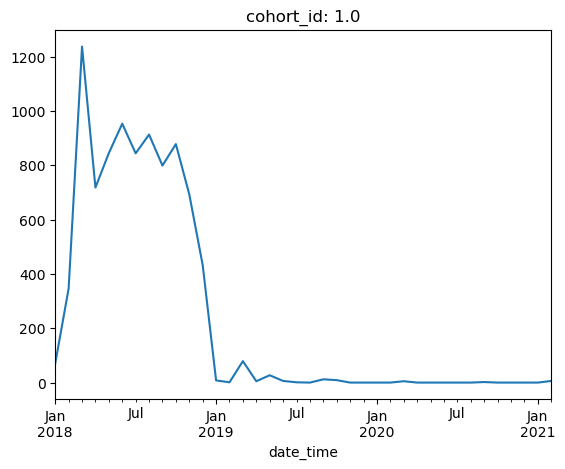

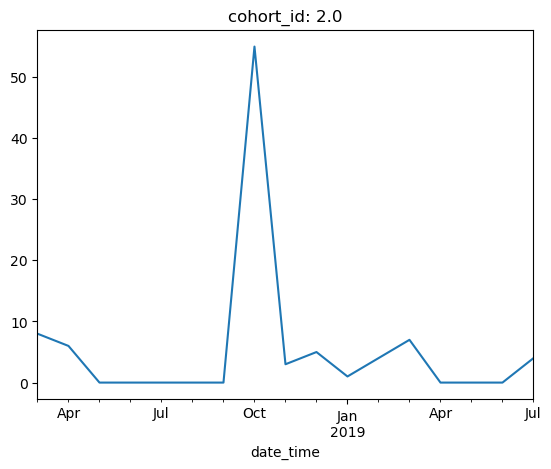

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 577.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


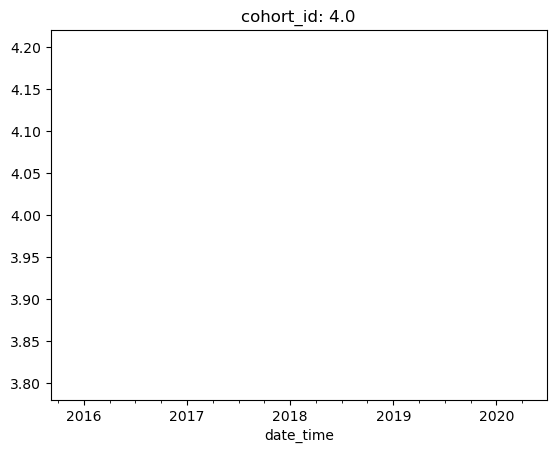

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 604.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


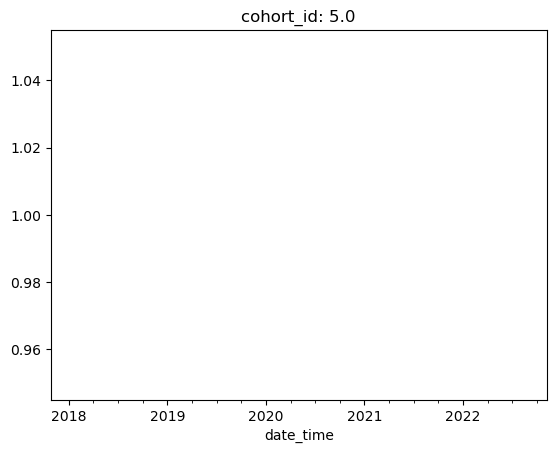

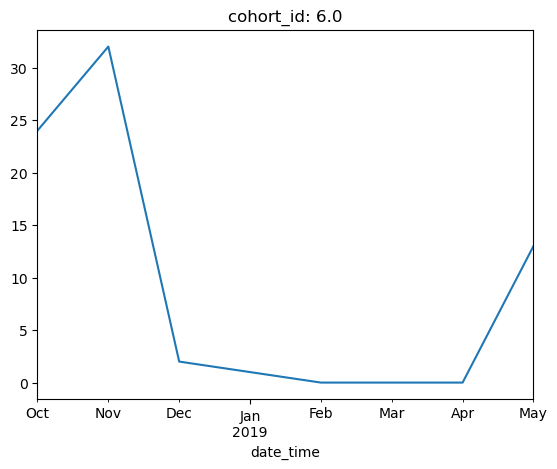

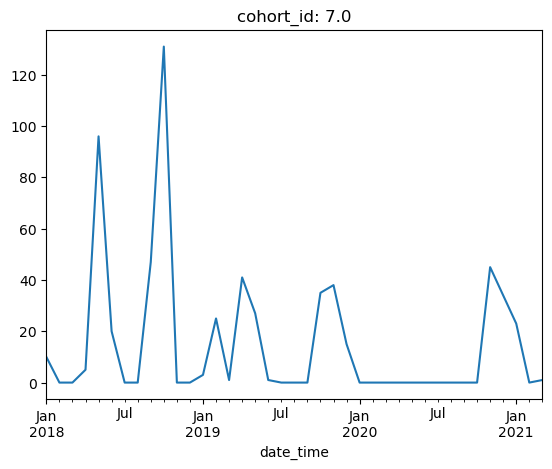

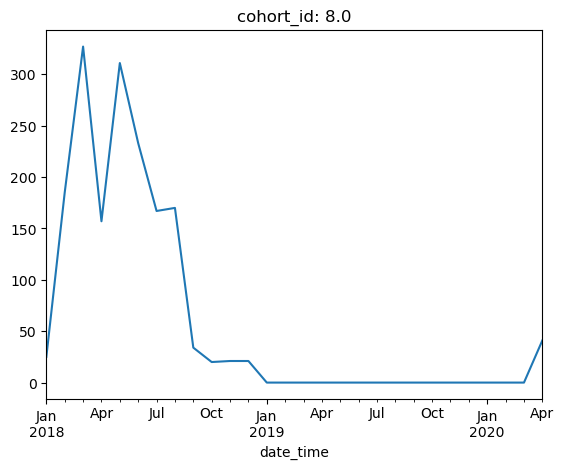

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 578.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


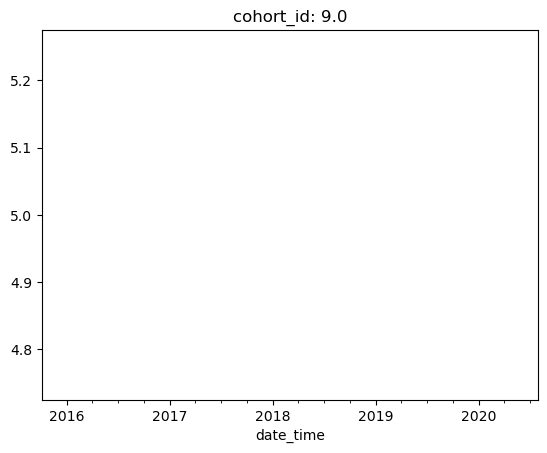

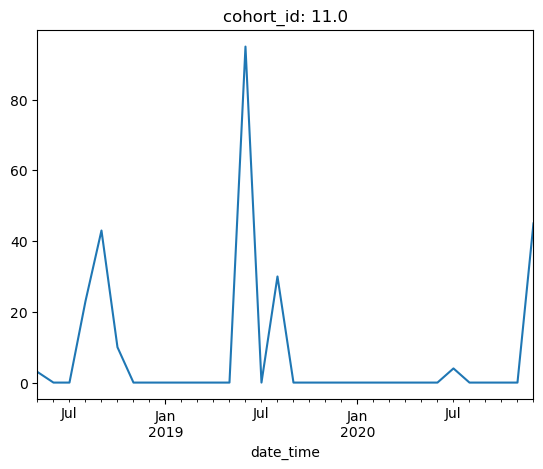

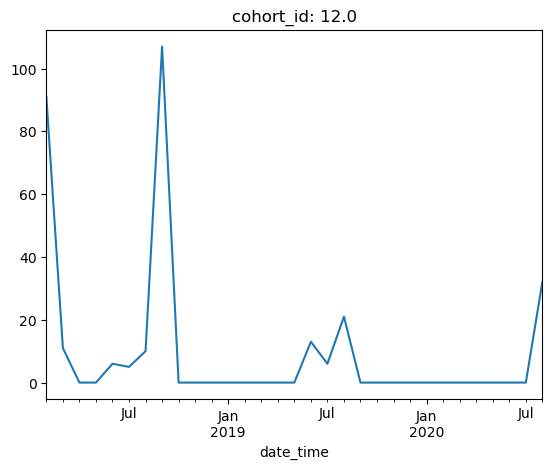

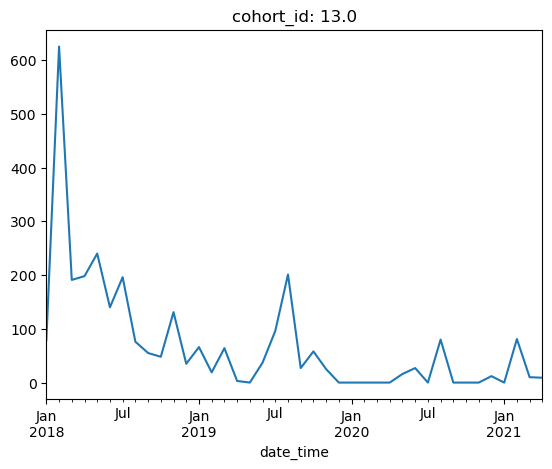

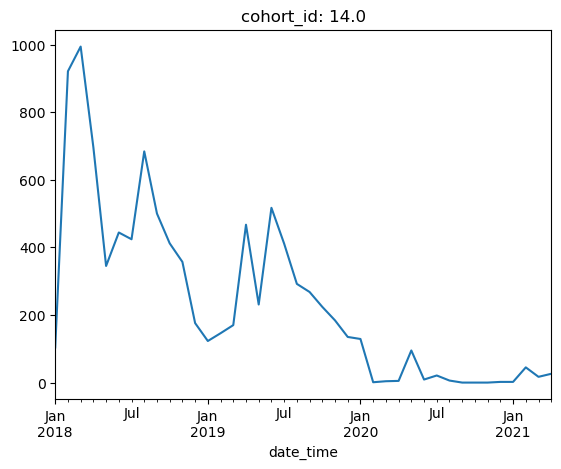

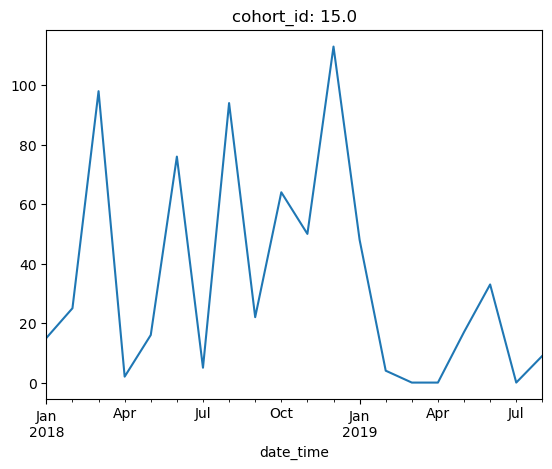

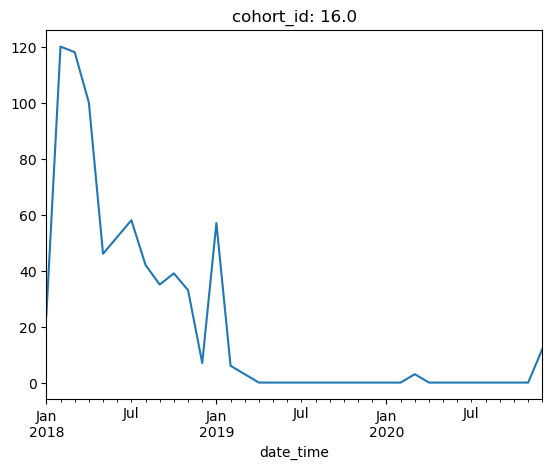

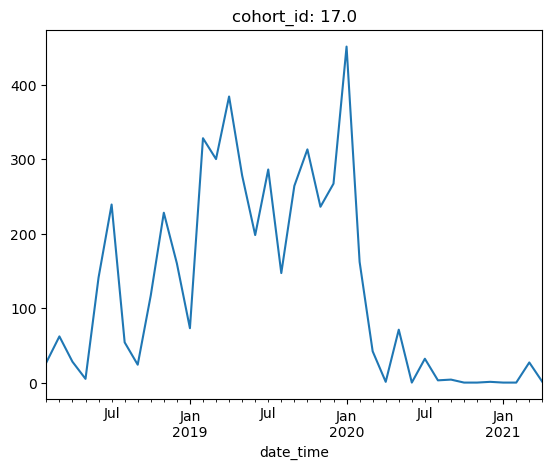

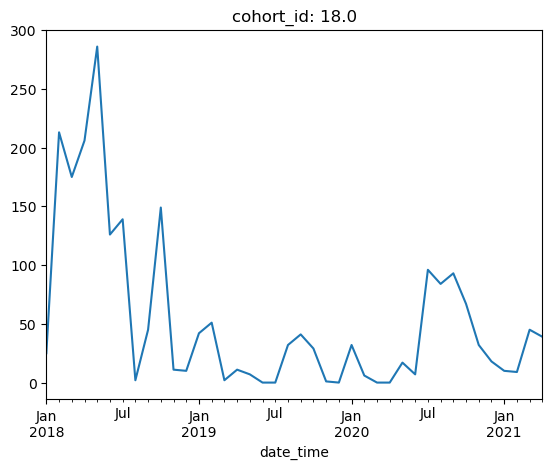

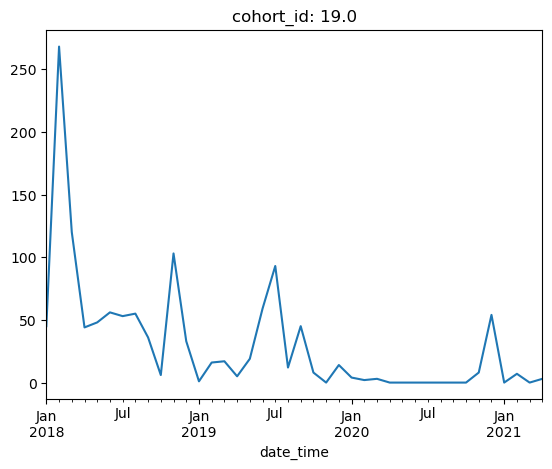

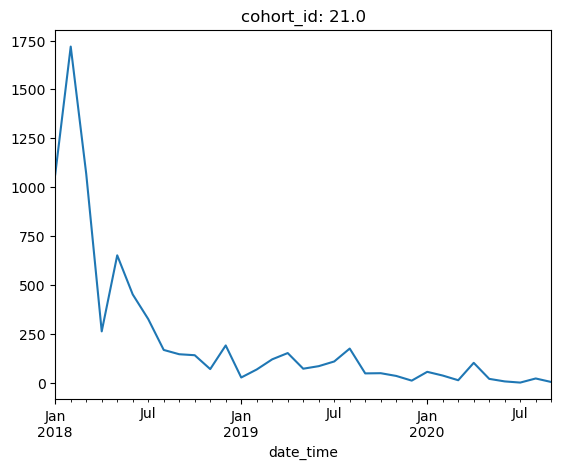

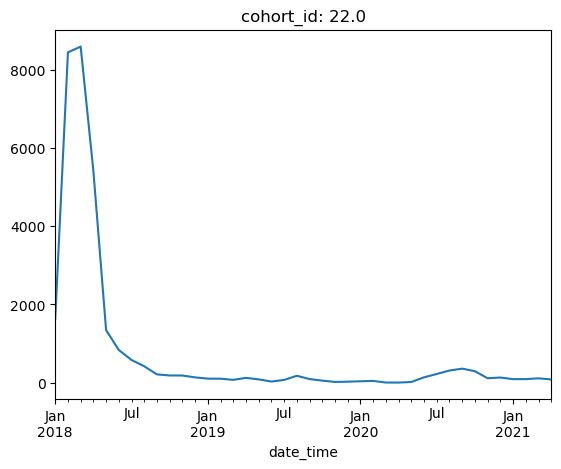

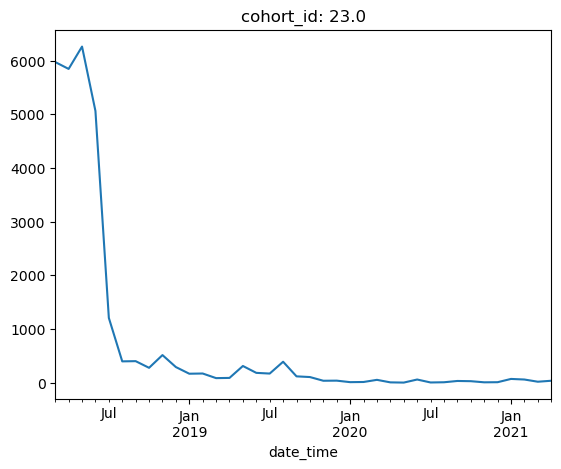

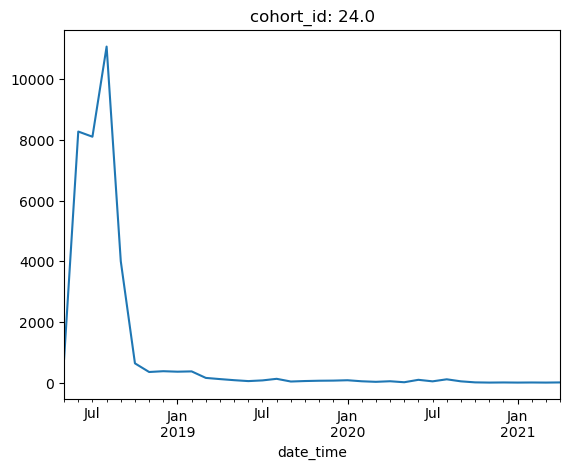

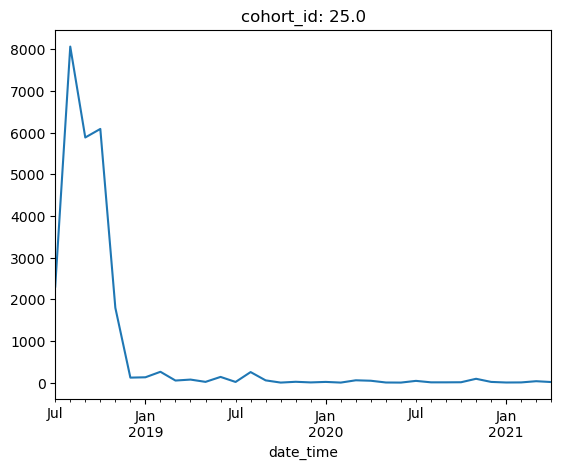

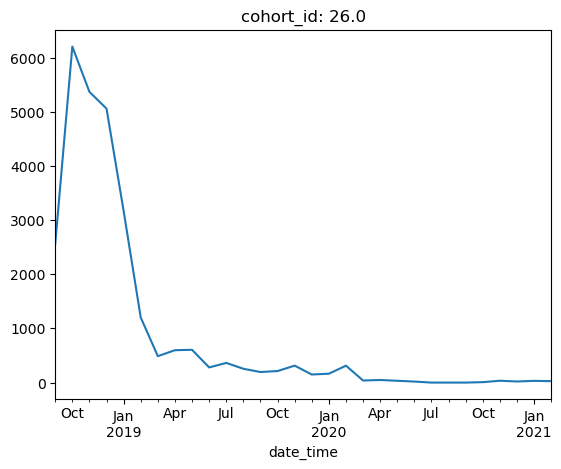

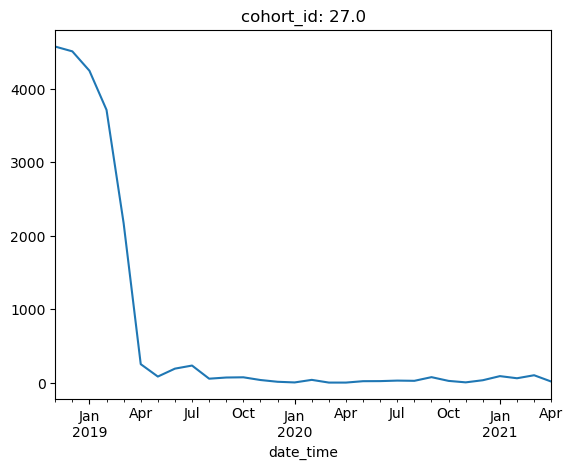

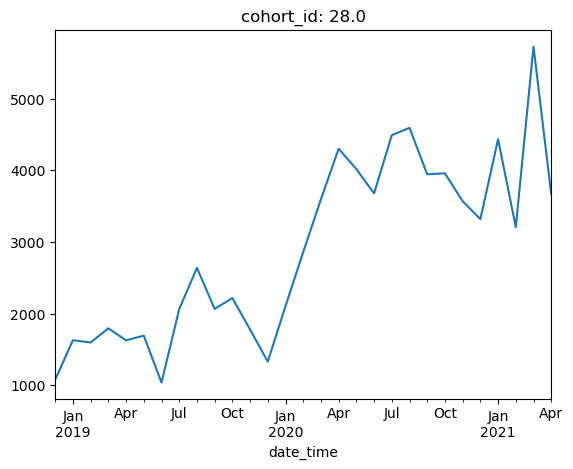

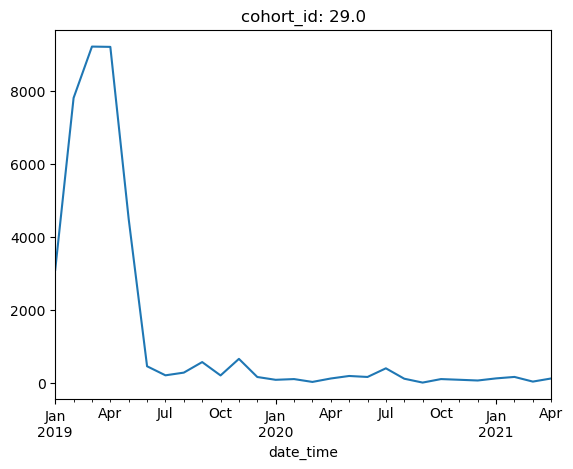

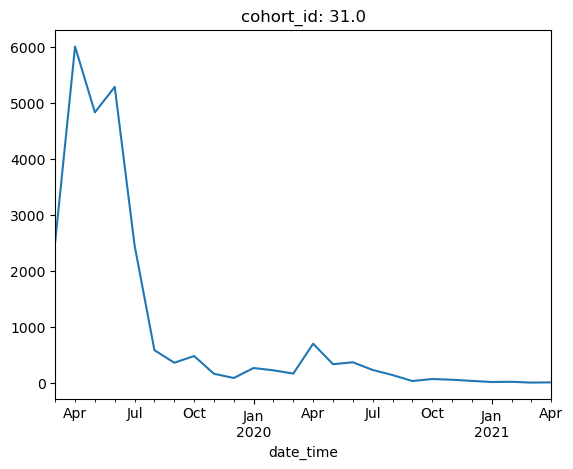

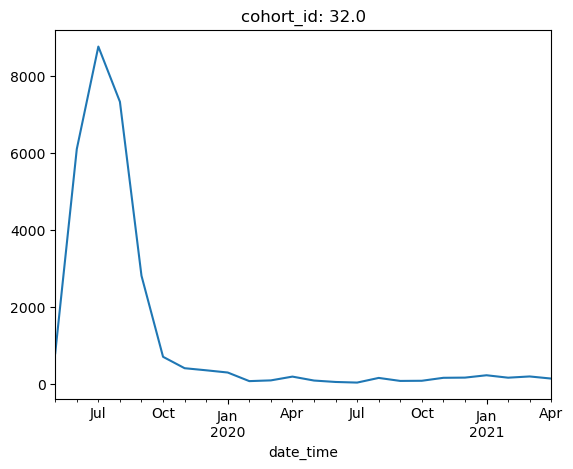

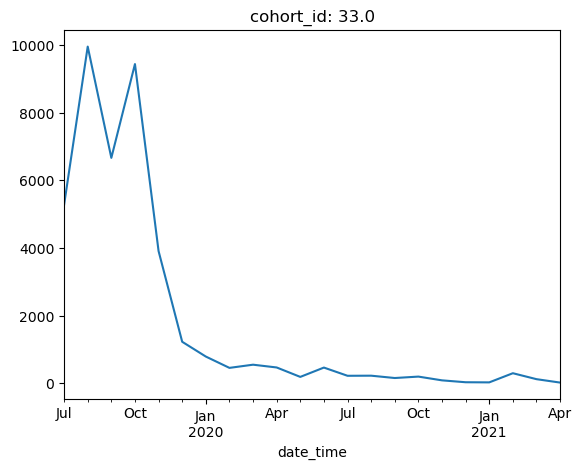

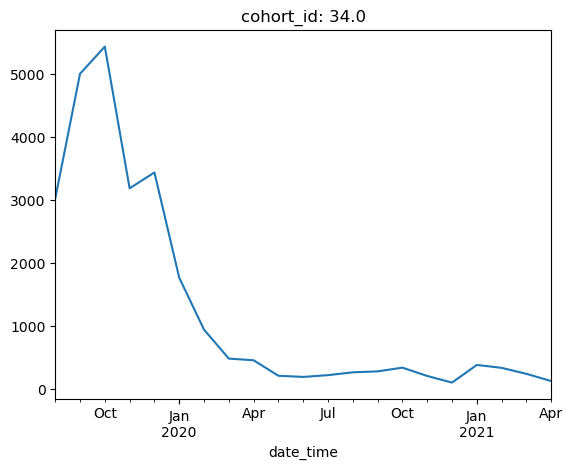

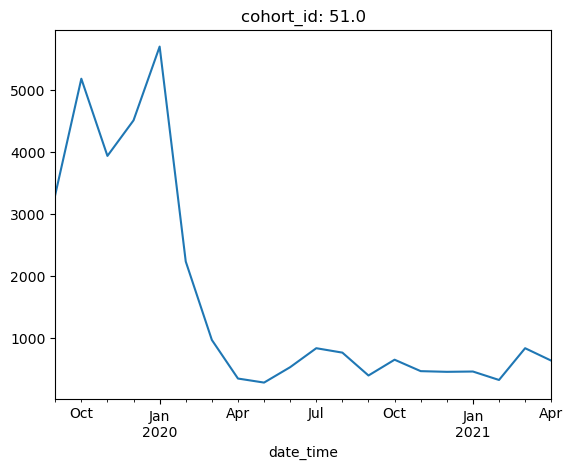

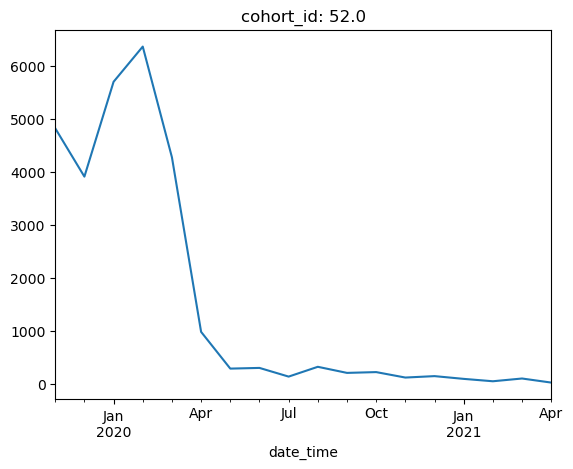

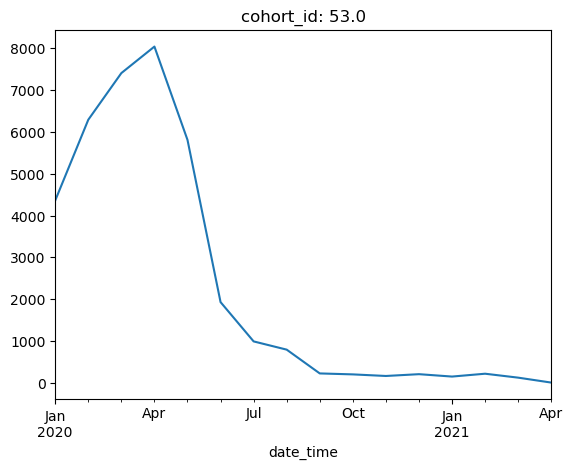

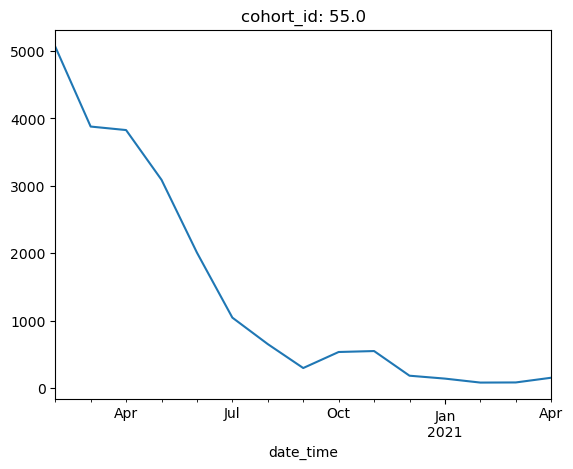

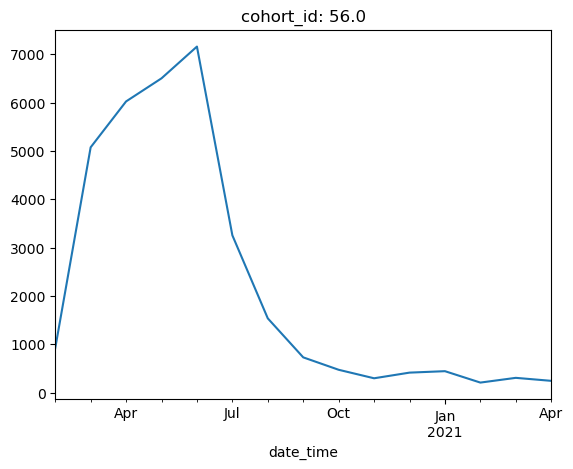

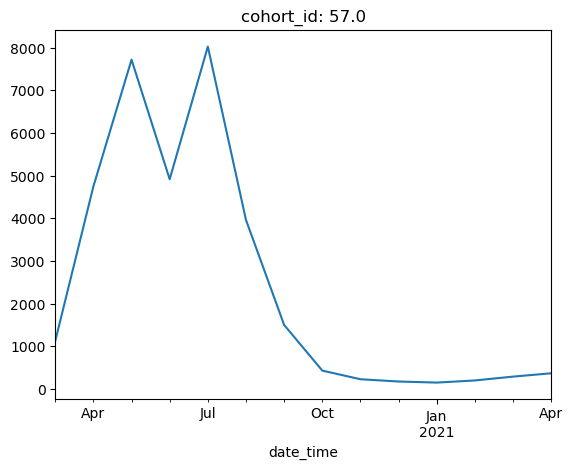

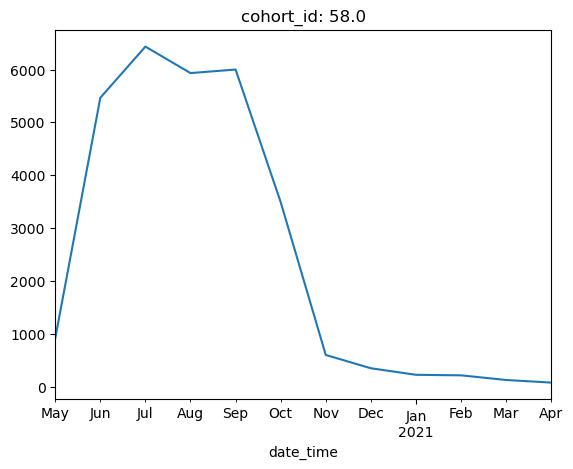

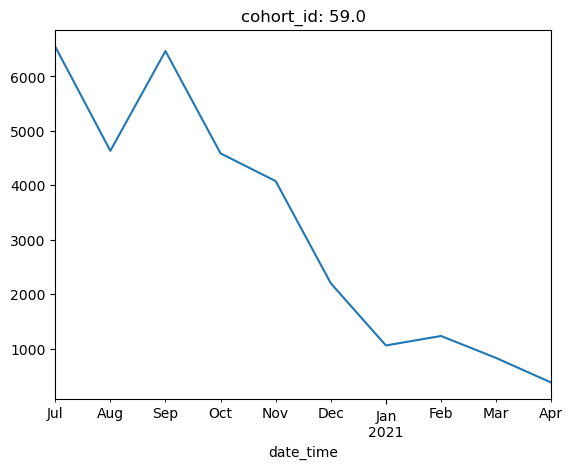

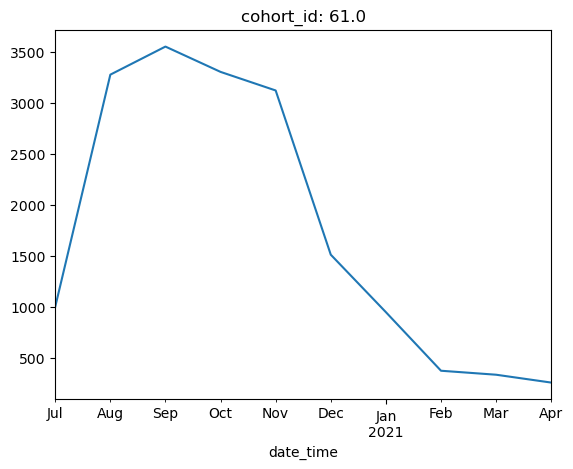

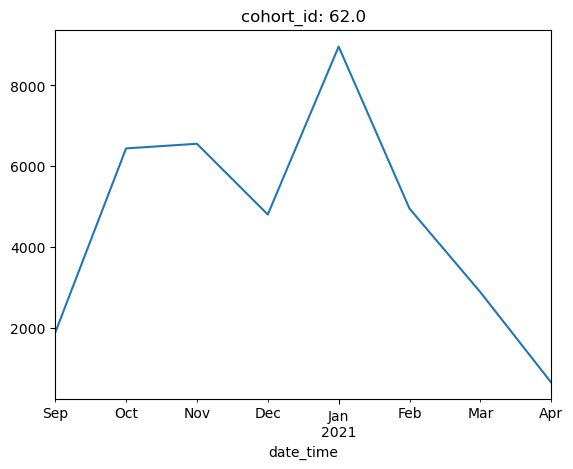

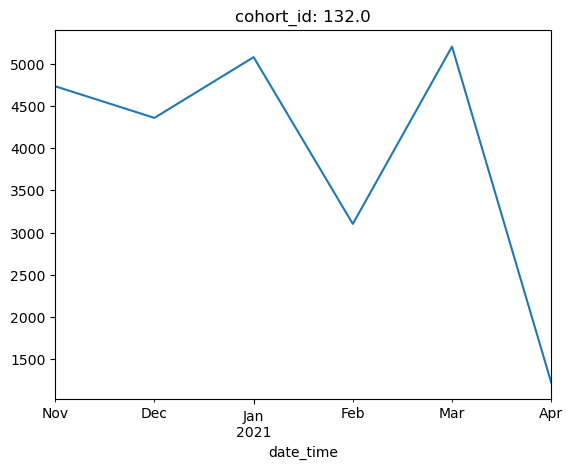

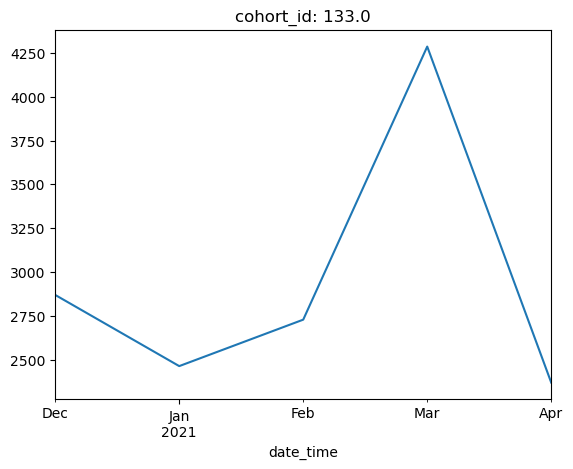

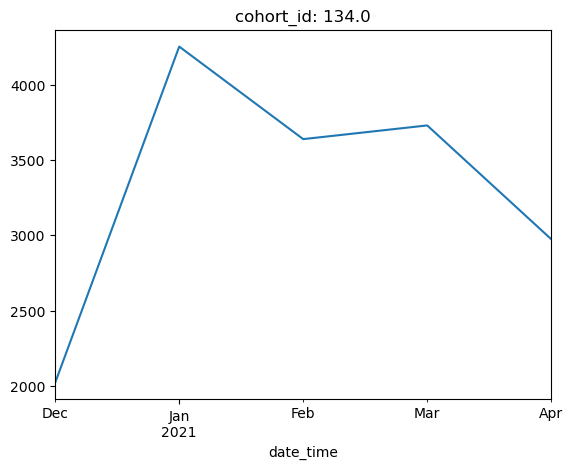

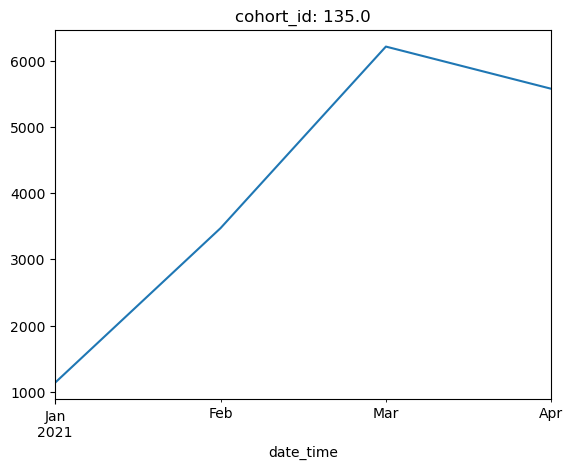

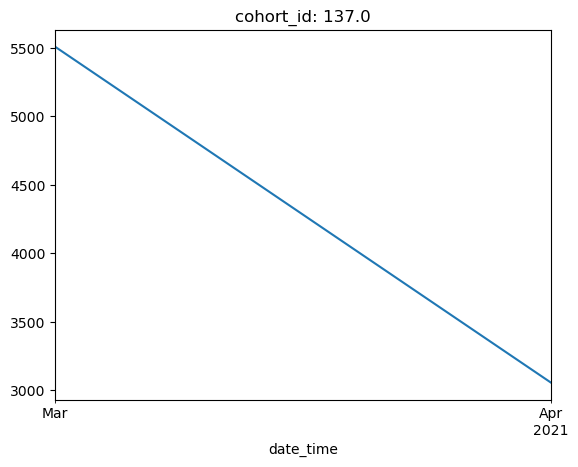

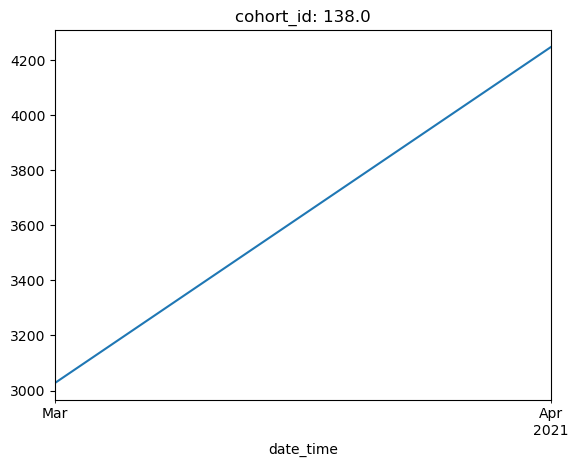

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 615.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


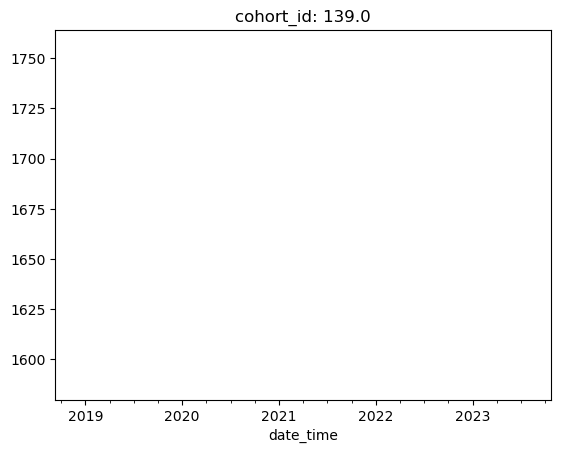

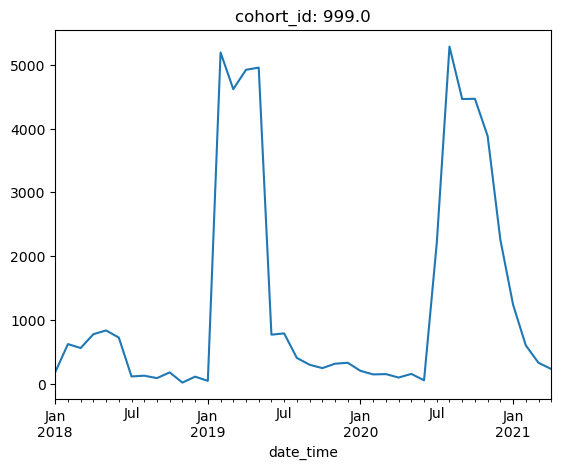

In [36]:
for cohort in cohorts:
    df[df.cohort_id == cohort].resample('M').count()['ip'].plot()
    plt.title(f'cohort_id: {cohort}')
    plt.show()

In [35]:
# Copy of X with just the "columns" :X_scaled[columns]
# make a scaler:
mmscaler = MinMaxScaler().fit(X_scaled[columns])
X_scaled[columns] = mmscaler.transform(X_scaled[columns])
# alternatively, X_scaled[columns] = MinMaxScaler().fit_transform(X_scaled[columns])
fig, axs = plt.subplots(len(columns), 2, figsize=(16,11))
for (ax1, ax2), col in zip(axs, columns):
    ax1.hist(X[col])
    ax1.set(title=f'Distribution of Unscaled {col}',
            xlabel=f'Value of {col}',
            ylabel=f'Count of {col}')
    ax2.hist(X_scaled[col])
    ax2.set(title=f'Distribution of Scaled {col}',
            xlabel=f'Value of {col}',
            ylabel=f'Count of {col}')
plt.tight_layout()
plt.show()

NameError: name 'MinMaxScaler' is not defined

In [ ]:
# so need to define when log entries for a cohort drop significantly week
# to week or month to month. It would seem that a rolling average or a
# shift would be good for this.
df[df.cohort_id == 1.0].resample('M').count()['ip']

#### 7. Which lessons are least accessed?


#### 8. Anything else I should be aware of?
